In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pickle

In [2]:
df = pd.read_csv('avg_by_game')
odds = pd.read_csv('nba_game_odds')

In [3]:
df.columns

Index(['Unnamed: 0', 'Home Points For', 'Home Points Against', 'Home eFG%',
       'Home FTr', 'Home ORB%', 'Home DRB%', 'Home AST%', 'Home STL%',
       'Home BLK%', 'Home TOV%', 'Home ORtg', 'Home DRtg', 'Home GP',
       'Home Win Rate', 'Away Points For', 'Away Points Against', 'Away eFG%',
       'Away FTr', 'Away ORB%', 'Away DRB%', 'Away AST%', 'Away STL%',
       'Away BLK%', 'Away TOV%', 'Away ORTG', 'Away DRtg', 'Away GP',
       'Away Win Rate', 'Home Win By', 'Home Wins By (Vegas)'],
      dtype='object')

In [4]:
df.head()

,Unnamed: 0,Home Points For,Home Points Against,Home eFG%,Home FTr,Home ORB%,Home DRB%,Home AST%,Home STL%,Home BLK%,...,Away AST%,Away STL%,Away BLK%,Away TOV%,Away ORTG,Away DRtg,Away GP,Away Win Rate,Home Win By,Home Wins By (Vegas)
0,2011-12-25 00:00:00 Boston @ New York,106.0,104.0,0.534,0.459,22.2,63.9,48.6,9.7,15.5,...,71.8,7.5,9.3,16.7,111.6,113.7,1,0.0,2,4.5
1,2011-12-25 00:00:00 Chicago @ Lakers,87.0,88.0,0.500,0.263,32.4,65.2,61.1,6.8,10.8,...,58.3,15.9,6.7,12.8,100.0,98.9,1,1.0,-1,-5.0
2,2011-12-25 00:00:00 Clippers @ Golden State,86.0,105.0,0.421,0.293,36.2,70.5,53.1,4.4,13.8,...,59.5,10.0,13.1,9.3,116.3,95.3,1,1.0,-19,-4.5
3,2011-12-25 00:00:00 Miami @ Dallas,94.0,105.0,0.433,0.366,18.2,60.5,74.2,10.1,0.0,...,47.4,9.1,11.1,19.0,105.7,94.7,1,1.0,-11,-4.5
4,2011-12-25 00:00:00 Orlando @ Oklahoma City,97.0,89.0,0.542,0.361,18.4,72.0,61.8,8.6,9.4,...,60.0,7.6,7.5,16.3,96.2,104.8,1,0.0,8,7.5


In [5]:
df.describe()

,Home Points For,Home Points Against,Home eFG%,Home FTr,Home ORB%,Home DRB%,Home AST%,Home STL%,Home BLK%,Home TOV%,...,Away AST%,Away STL%,Away BLK%,Away TOV%,Away ORTG,Away DRtg,Away GP,Away Win Rate,Home Win By,Home Wins By (Vegas)
count,11656.000000,11656.000000,11656.000000,11656.000000,11656.000000,11656.000000,11656.000000,11656.000000,11656.000000,11656.000000,...,11656.000000,11656.000000,11656.000000,11656.000000,11656.000000,11656.000000,11656.000000,11656.000000,11656.000000,11656.000000
mean,104.947063,102.521858,0.513193,0.280954,24.431174,76.457736,59.206534,8.057570,8.810403,12.824264,...,57.613724,8.064581,8.094535,12.983971,106.434483,108.988848,20.077299,0.420218,2.506863,2.940760
std,7.612108,7.670299,0.032692,0.044413,3.686637,3.208211,5.301791,1.302268,2.024777,1.423058,...,4.867263,1.276050,1.771742,1.554915,5.383995,4.737715,11.452876,0.204483,13.783723,10.006102
min,70.000000,64.000000,0.327000,0.063000,5.900000,54.800000,27.300000,1.100000,0.000000,3.400000,...,27.300000,1.100000,0.000000,2.800000,78.500000,71.800000,1.000000,0.000000,-57.000000,-18.000000
25%,99.600000,97.428571,0.493039,0.251530,21.888725,74.472259,55.832143,7.218550,7.468996,11.900000,...,54.565395,7.250000,7.036201,12.059079,103.262859,106.030769,10.000000,0.285714,-7.000000,-3.000000
50%,104.833333,102.014286,0.513732,0.277128,24.400000,76.507500,59.429057,8.001429,8.628992,12.792404,...,57.642481,8.035000,7.997014,12.953846,106.288194,109.270417,20.000000,0.411765,4.000000,3.500000
75%,109.923077,107.775090,0.534113,0.306277,26.818444,78.350338,62.648986,8.858456,9.952000,13.613544,...,60.717339,8.813916,9.043924,13.850000,109.575000,112.213844,30.000000,0.545455,11.000000,7.500000
max,158.000000,159.000000,0.736000,0.588000,46.200000,95.700000,84.400000,18.200000,24.300000,23.400000,...,83.300000,16.700000,23.800000,23.600000,145.000000,144.100000,41.000000,1.000000,61.000000,240.500000


In [7]:
df.describe()

,Home Points For,Home Points Against,Home eFG%,Home FTr,Home ORB%,Home DRB%,Home AST%,Home STL%,Home BLK%,Home TOV%,...,Away AST%,Away STL%,Away BLK%,Away TOV%,Away ORTG,Away DRtg,Away GP,Away Win Rate,Home Win By,Home Wins By (Vegas)
count,11640.000000,11640.000000,11640.000000,11640.000000,11640.000000,11640.000000,11640.000000,11640.000000,11640.000000,11640.000000,...,11640.000000,11640.000000,11640.000000,11640.000000,11640.000000,11640.000000,11640.000000,11640.000000,11640.000000,11640.000000
mean,104.950030,102.525964,0.513205,0.280963,24.431861,76.457984,59.208349,8.057664,8.810719,12.824268,...,57.613905,8.064132,8.093861,12.983611,106.434071,108.991436,20.081959,0.420157,2.506615,2.663015
std,7.612502,7.672309,0.032694,0.044416,3.687691,3.209180,5.301386,1.301628,2.024389,1.422885,...,4.865932,1.274356,1.771060,1.553486,5.382643,4.735471,11.450067,0.204373,13.789432,6.615162
min,70.000000,64.000000,0.327000,0.063000,5.900000,54.800000,27.300000,1.100000,0.000000,3.400000,...,27.300000,1.100000,0.000000,2.800000,78.500000,71.800000,1.000000,0.000000,-57.000000,-18.000000
25%,99.600000,97.428571,0.493057,0.251530,21.888146,74.472649,55.837879,7.218750,7.469231,11.900000,...,54.566406,7.250000,7.035101,12.059079,103.260000,106.031264,10.000000,0.285714,-7.000000,-3.000000
50%,104.836022,102.034483,0.513737,0.277138,24.400000,76.508712,59.429634,8.000000,8.629412,12.792404,...,57.643929,8.034891,7.995119,12.954006,106.288194,109.271131,20.000000,0.411765,4.000000,3.500000
75%,109.926829,107.780678,0.534113,0.306281,26.820780,78.350000,62.648986,8.858333,9.952000,13.614286,...,60.715417,8.813231,9.043924,13.850000,109.575000,112.213844,30.000000,0.545455,11.000000,7.500000
max,158.000000,159.000000,0.736000,0.588000,46.200000,95.700000,84.400000,18.200000,24.300000,23.400000,...,83.300000,16.700000,23.800000,23.600000,145.000000,144.100000,41.000000,1.000000,61.000000,21.500000


In [8]:
df.set_index(df['GameID'], drop=True, inplace=True)
df.drop(columns='GameID', inplace=True)

odds.set_index(odds['GameID'], drop=True, inplace=True)

In [9]:
df.sort_index(inplace=True)
odds.sort_index(inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11640 entries, 2011-12-25 00:00:00 Boston @ New York to 2021-05-21 00:00:00 Memphis @ Golden State
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Home Points For       11640 non-null  float64
 1   Home Points Against   11640 non-null  float64
 2   Home eFG%             11640 non-null  float64
 3   Home FTr              11640 non-null  float64
 4   Home ORB%             11640 non-null  float64
 5   Home DRB%             11640 non-null  float64
 6   Home AST%             11640 non-null  float64
 7   Home STL%             11640 non-null  float64
 8   Home BLK%             11640 non-null  float64
 9   Home TOV%             11640 non-null  float64
 10  Home ORtg             11640 non-null  float64
 11  Home DRtg             11640 non-null  float64
 12  Home GP               11640 non-null  int64  
 13  Home Win Rate         11640 non-null  float64
 14  Aw

In [14]:
odds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11640 entries, 2011-12-25 00:00:00 Boston @ New York to 2021-05-21 00:00:00 Memphis @ Golden State
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   GameID               11640 non-null  object 
 1   Date                 11640 non-null  object 
 2   Season               11640 non-null  int64  
 3   Home                 11640 non-null  object 
 4   Away                 11640 non-null  object 
 5   Home Win By (Vegas)  11640 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 636.6+ KB


In [12]:
sum(df.index == odds.index)

10747

There seems to be some GameID's that don't match up. They makeup <10% of the data so we will just delete them.

In [15]:
df_index = []
odds_index = []

for i in range(len(df.index)):
    if df.index[i] != odds.index[i]:
        df_index.append(df.index[i])
        odds_index.append(odds.index[i])

In [17]:
len(df_index) == len(odds_index)

True

In [19]:
df.drop(index=df_index, inplace=True)
odds.drop(index=odds_index, inplace=True)

In [20]:
sum(df.index != odds.index)

0

There are no more indexes that don't match.

In [23]:
df['Season'] = odds['Season']

In [25]:
df.head()

,Home Points For,Home Points Against,Home eFG%,Home FTr,Home ORB%,Home DRB%,Home AST%,Home STL%,Home BLK%,Home TOV%,...,Away STL%,Away BLK%,Away TOV%,Away ORTG,Away DRtg,Away GP,Away Win Rate,Home Win By,Home Wins By (Vegas),Season
GameID,,,,,,,,,,,,,,,,,,,,,
2011-12-25 00:00:00 Boston @ New York,106.0,104.0,0.534,0.459,22.2,63.9,48.6,9.7,15.5,15.2,...,7.5,9.3,16.7,111.6,113.7,1,0.0,2,4.5,2011
2011-12-25 00:00:00 Chicago @ Lakers,87.0,88.0,0.500,0.263,32.4,65.2,61.1,6.8,10.8,16.7,...,15.9,6.7,12.8,100.0,98.9,1,1.0,-1,-5.0,2011
2011-12-25 00:00:00 Clippers @ Golden State,86.0,105.0,0.421,0.293,36.2,70.5,53.1,4.4,13.8,14.7,...,10.0,13.1,9.3,116.3,95.3,1,1.0,-19,-4.5,2011
2011-12-25 00:00:00 Miami @ Dallas,94.0,105.0,0.433,0.366,18.2,60.5,74.2,10.1,0.0,15.2,...,9.1,11.1,19.0,105.7,94.7,1,1.0,-11,-4.5,2011
2011-12-25 00:00:00 Orlando @ Oklahoma City,97.0,89.0,0.542,0.361,18.4,72.0,61.8,8.6,9.4,16.1,...,7.6,7.5,16.3,96.2,104.8,1,0.0,8,7.5,2011


In [26]:
data = df.copy()

In [27]:
data.head()

,Home Points For,Home Points Against,Home eFG%,Home FTr,Home ORB%,Home DRB%,Home AST%,Home STL%,Home BLK%,Home TOV%,...,Away STL%,Away BLK%,Away TOV%,Away ORTG,Away DRtg,Away GP,Away Win Rate,Home Win By,Home Wins By (Vegas),Season
GameID,,,,,,,,,,,,,,,,,,,,,
2011-12-25 00:00:00 Boston @ New York,106.0,104.0,0.534,0.459,22.2,63.9,48.6,9.7,15.5,15.2,...,7.5,9.3,16.7,111.6,113.7,1,0.0,2,4.5,2011
2011-12-25 00:00:00 Chicago @ Lakers,87.0,88.0,0.500,0.263,32.4,65.2,61.1,6.8,10.8,16.7,...,15.9,6.7,12.8,100.0,98.9,1,1.0,-1,-5.0,2011
2011-12-25 00:00:00 Clippers @ Golden State,86.0,105.0,0.421,0.293,36.2,70.5,53.1,4.4,13.8,14.7,...,10.0,13.1,9.3,116.3,95.3,1,1.0,-19,-4.5,2011
2011-12-25 00:00:00 Miami @ Dallas,94.0,105.0,0.433,0.366,18.2,60.5,74.2,10.1,0.0,15.2,...,9.1,11.1,19.0,105.7,94.7,1,1.0,-11,-4.5,2011
2011-12-25 00:00:00 Orlando @ Oklahoma City,97.0,89.0,0.542,0.361,18.4,72.0,61.8,8.6,9.4,16.1,...,7.6,7.5,16.3,96.2,104.8,1,0.0,8,7.5,2011


In [28]:
y = data['Home Win By']
x = data.drop(columns='Home Win By')

In [30]:
#instantiate rest of regression models
knn = KNeighborsRegressor()
dtc = DecisionTreeRegressor(random_state=42)
bagged_tree = BaggingRegressor(DecisionTreeRegressor())
forest = RandomForestRegressor()
ada = AdaBoostRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
xgb = XGBRegressor()

In [31]:
models = [knn,dtc,bagged_tree,forest,ada,gb,xgb]

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [33]:
#function to train/test models and prints RMSE
def run_model(x_train, x_test, y_train, y_test, model, scale=False):

    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    print('Training RMSE for {} model: {}'.format(model, mean_squared_error(y_train, y_train_pred)**0.5))
    print('Testing RMSE for {} model: {}'.format(model, mean_squared_error(y_test, y_test_pred)**0.5))
    

In [34]:
for model in models:
    run_model(x_train, x_test, y_train, y_test, model)

Training RMSE for KNeighborsRegressor() model: 10.271780466180603
Testing RMSE for KNeighborsRegressor() model: 12.619274486856149
Training RMSE for DecisionTreeRegressor(random_state=42) model: 0.0
Testing RMSE for DecisionTreeRegressor(random_state=42) model: 16.418092990568876
Training RMSE for BaggingRegressor(base_estimator=DecisionTreeRegressor()) model: 5.131507186486518
Testing RMSE for BaggingRegressor(base_estimator=DecisionTreeRegressor()) model: 12.244703403675793
Training RMSE for RandomForestRegressor() model: 4.371433531077112
Testing RMSE for RandomForestRegressor() model: 11.686768462226464
Training RMSE for AdaBoostRegressor(random_state=42) model: 11.443700784246639
Testing RMSE for AdaBoostRegressor(random_state=42) model: 11.83314054769896
Training RMSE for GradientBoostingRegressor(random_state=42) model: 10.691862030834235
Testing RMSE for GradientBoostingRegressor(random_state=42) model: 11.541842073117454
Training RMSE for XGBRegressor(base_score=0.5, booster='

In [56]:
linreg1 = LinearRegression()
linreg1.fit(x_train, y_train)
y_train5_pred = linreg1.predict(x_train)
y_test5_pred = linreg1.predict(x_test)
print('Training RMSE for linear regression model using optimal parameters: {}'.format(mean_squared_error(y_train, y_train5_pred)**0.5))
print('Testing RMSE for linear regression model using optimal parameters: {}'.format(mean_squared_error(y_test, y_test5_pred)**0.5))

Training RMSE for linear regression model using optimal parameters: 11.220377765253023
Testing RMSE for linear regression model using optimal parameters: 11.394981130197868


In [ ]:
# rf_param_grid = {
#     'n_estimators': [50, 100, 150, 200],
#     'max_depth': [None, 1, 5, 10],
#     'min_samples_split': [1, 3, 5],
#     'min_samples_leaf': [1, 3, 5]
# }
# forest2 = RandomForestRegressor()
# forest2.fit(x_train2, y_train2)

In [ ]:
# dt_grid_search = GridSearchCV(forest2, rf_param_grid, cv=3, return_train_score=True)
# dt_grid_search.fit(x_train2,y_train2)
# dt_grid_search.best_params_

In [ ]:
# rf_param_grid2 = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [10, 15, 20],
#     'min_samples_split': [2,3,4],
#     'min_samples_leaf': [2,3,4]
# }

In [ ]:
# dt_grid_search2 = GridSearchCV(forest2, rf_param_grid2, cv=3, return_train_score=True)
# dt_grid_search2.fit(x_train2,y_train2)
# dt_grid_search.best_params_

In [36]:
#optimized parameters for RF model
forest3 = RandomForestRegressor(max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=200)
forest3.fit(x_train, y_train)
y_train3_pred = forest3.predict(x_train)
y_test3_pred = forest3.predict(x_test)

In [38]:
print('Training RMSE for random forest model using optimal parameters: {}'.format(mean_squared_error(y_train, y_train3_pred)**0.5))
print('Testing RMSE for random forest model using optimal parameters: {}'.format(mean_squared_error(y_test, y_test3_pred)**0.5))

Training RMSE for random forest model using optimal parameters: 8.768349360076124
Testing RMSE for random forest model using optimal parameters: 11.604083753114555


In [ ]:
# rf_param_gb = {
#     'n_estimators': [100, 200],
#     'max_depth': [1, 5, 10],
#     'min_samples_split': [1, 3, 5],
#     'min_samples_leaf': [1, 3, 5],
#     'learning_rate': [.05, .1, .2]
# }
# gb2 = GradientBoostingRegressor(random_state=42)
# gb2.fit(x_train2, y_train2)

In [ ]:
# dt_grid_search3 = GridSearchCV(gb2, rf_param_gb, cv=3, return_train_score=True)
# dt_grid_search3.fit(x_train2,y_train2)
# dt_grid_search3.best_params_

In [39]:
#optimized parameters for GB
gb3 = GradientBoostingRegressor(learning_rate=0.2, max_depth=1, min_samples_leaf=5, min_samples_split=3, n_estimators=200, random_state=42)

In [41]:
gb3.fit(x_train, y_train)
y_train4_pred = gb3.predict(x_train)
y_test4_pred = gb3.predict(x_test)

print('Training RMSE for gradient boost model using optimal parameters: {}'.format(mean_squared_error(y_train, y_train4_pred)**0.5))
print('Testing RMSE for gradient boost model using optimal parameters: {}'.format(mean_squared_error(y_test, y_test4_pred)**0.5))

Training RMSE for gradient boost model using optimal parameters: 11.178372974553685
Testing RMSE for gradient boost model using optimal parameters: 11.539922732709558


In [42]:
#function to calculate performance against vegas spread
def beat_vegas(result, vegas, prediction):
    tie = 0
    games = 0
    wins = 0
    win_total = 0
    loss = 0
    loss_total = 0
    
    for i in range(len(result)):
        if ((result[i]>vegas[i]) & (prediction[i]>vegas[i])):
            wins += 1
            games += 1
            win_total += abs(vegas[i]-prediction[i])
            
        elif ((result[i]<vegas[i]) & (prediction[i]<vegas[i])):
            wins += 1
            games += 1
            win_total += abs(vegas[i]-prediction[i])
            
        elif (result[i]==vegas[i]):
            tie += 1
            
        else:
            loss += 1
            games += 1
            loss_total += abs(vegas[i]-prediction[i])
            
    win_rate = (wins/games)*100
    win_distance = win_total/wins
    loss_distance = loss_total/loss
    
    print('Beat Vegas {}% of the time'.format(win_rate))
    print('Vegas RMSE: {}'.format(mean_squared_error(result, vegas)**0.5))
    print('Our RMSE: {}'.format(mean_squared_error(result, prediction)**0.5))
    print('When we beat Vegas, our prediction is {} points away from the Vegas spread.'.format(win_distance))
    print('When we lose to Vegas, our prediction is {} points away from the Vegas spread.'.format(loss_distance))

In [43]:
#results for forest gridsearch
beat_vegas(y_test, x_test['Home Wins By (Vegas)'], y_test3_pred)

Beat Vegas 62.47165532879818% of the time
Vegas RMSE: 12.41746477088067
Our RMSE: 11.604083753114555
When we beat Vegas, our prediction is 3.3623673476457627 points away from the Vegas spread.
When we lose to Vegas, our prediction is 2.2285600426473273 points away from the Vegas spread.


In [44]:
#results for GB gridsearch
beat_vegas(y_test, x_test['Home Wins By (Vegas)'], y_test4_pred)

Beat Vegas 62.887377173091465% of the time
Vegas RMSE: 12.41746477088067
Our RMSE: 11.539922732709558
When we beat Vegas, our prediction is 3.5564875285130593 points away from the Vegas spread.
When we lose to Vegas, our prediction is 2.369119422081198 points away from the Vegas spread.


In [65]:
#results for linreg
beat_vegas(y_test, x_test['Home Wins By (Vegas)'], y_test5_pred)

Beat Vegas 62.7739984882842% of the time
Vegas RMSE: 12.41746477088067
Our RMSE: 11.394981130197868
When we beat Vegas, our prediction is 3.739830614709348 points away from the Vegas spread.
When we lose to Vegas, our prediction is 2.322036635525141 points away from the Vegas spread.


In [48]:
#function to display top features
def feature_importances(model, X_train, linreg = False):
    if linreg:
        importance = model.coef_
    else:
        importance = model.feature_importances_
    
    columns = list(X_train.columns)
    df = pd.DataFrame(columns=['Feature', 'Importance'])
    df['Feature'] = columns
    df['Importance'] = abs(importance)
    df_sorted = df.sort_values(by='Importance', ascending = False)
    top_features = df_sorted['Feature'][0:12]
    top_importances = df_sorted['Importance'][0:12]
    
    plt.barh(top_features, top_importances)
    plt.title('Feature Importances')
    plt.show()

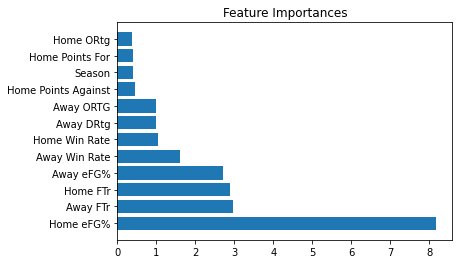

In [57]:
feature_importances(linreg1, x_train, linreg=True)

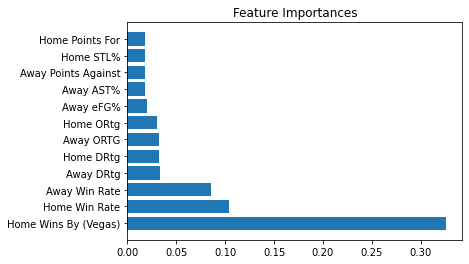

In [51]:
feature_importances(forest3, x_train)

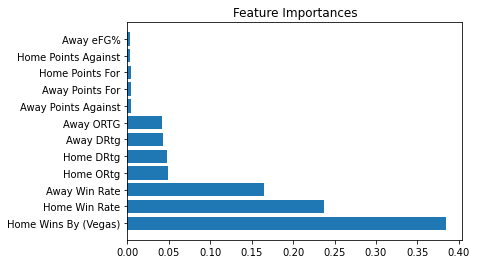

In [52]:
feature_importances(gb3, x_train)

In [53]:
#df to hold test model predictions, vegas predictions, and results
results = pd.DataFrame(columns=['Linreg Prediction', 'GB Prediction', 'RF Prediction', 'Vegas Prediction', 'Actual'],
                      index = x_test.index)

In [58]:
results['Linreg Prediction'] = y_test5_pred

In [60]:
results['GB Prediction'] = y_test4_pred
results['RF Prediction'] = y_test3_pred
results['Vegas Prediction'] = x_test['Home Wins By (Vegas)']
results['Actual'] = y_test

In [61]:
results

,Linreg Prediction,GB Prediction,RF Prediction,Vegas Prediction,Actual
GameID,,,,,
2012-04-03 00:00:00 San Antonio @ Cleveland,-10.265094,-11.287887,-11.736785,-9.0,-35
2016-01-24 00:00:00 Oklahoma City @ Brooklyn,-13.833293,-11.242072,-10.241167,-13.5,10
2018-03-02 00:00:00 Denver @ Memphis,-2.066846,-5.941318,-2.466321,-9.0,-6
2019-01-11 00:00:00 Chicago @ Golden State,13.044138,14.478312,18.083757,15.5,37
2018-12-30 00:00:00 Sacramento @ Lakers,1.197895,2.362965,3.485714,2.0,7
...,...,...,...,...,...
2015-10-29 00:00:00 Dallas @ Clippers,11.586846,10.931435,8.481239,12.0,16
2015-01-31 00:00:00 Dallas @ Orlando,-12.846462,-10.938260,-9.997324,-7.0,-15
2019-03-06 00:00:00 Minnesota @ Detroit,4.731060,7.398783,5.223562,4.5,17


In [64]:
#pickle models to use for later
linreg_file = 'linreg_model.sav'
pickle.dump(linreg1, open(linreg_file, 'wb'))

rf_file = 'rf_model.sav'
pickle.dump(forest3, open(rf_file, 'wb'))

gb_file = 'gb_model.sav'
pickle.dump(gb3, open(gb_file, 'wb'))

In [62]:
data.to_csv('avg_by_game')
odds.to_csv('nba_game_odds')
results.to_csv('predictions')
